In [134]:
import numpy as np
from scipy import stats
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

# Generating data and estimate mu and var

## plot functions

In [209]:
def plot_random_variables(data, title, kde=False, bins=10, est_data=None, stat='count'):
    fig, ax = plt.subplots()
    sns.histplot(data,
                 kde=kde,
                 bins=bins,
                 stat=stat,
                 color="skyblue",
                 ax=ax)

    if est_data is not None:
        ax.scatter(x=est_data[0], y=est_data[1], c='r')
    ax.set(xlabel=title, ylabel='Frequency')
    plt.show()

In [118]:
sample_n = 10000

## estimator for discrete variable

In [106]:
def loss(params, data, dist):
    loss = 0
    for i in range(len(data)):
        if dist not in ['bernoulli', 'binomial', 'poisson']:
            print('invalid dist')
            return 0
        if dist == 'poisson':
            loglikelihood = stats.poisson.logpmf(data[i], params[0])
            loss -= loglikelihood

        if dist == 'bernoulli':
            loglikelihood = stats.bernoulli.logpmf(data[i], params[0])
            loss -= loglikelihood

        if dist == 'binomial':
            # k, n, p
            loglikelihood = stats.binom.logpmf(data[i], params[0], params[1])
            loss -= loglikelihood

    return loss
        

## Bernoulli Random Variable

In [439]:
from scipy.stats import bernoulli
bern_data = bernoulli.rvs(size=sample_n, p=0.6)

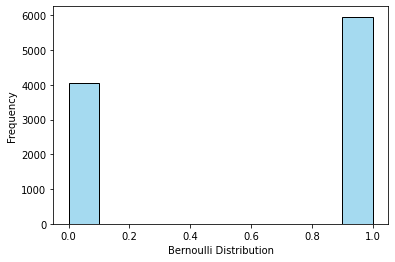

In [210]:
plot_random_variables(bern_data, 'Bernoulli Distribution')

In [146]:
params = [1]
dist = 'bernoulli'
bern_est = scipy.optimize.fmin(loss, params, args=(bern_data, dist))

Optimization terminated successfully.
         Current function value: 6747.166916
         Iterations: 16
         Function evaluations: 32


In [147]:
bern_p_est = bern_est[0]
bern_p_est

0.5957031249999997

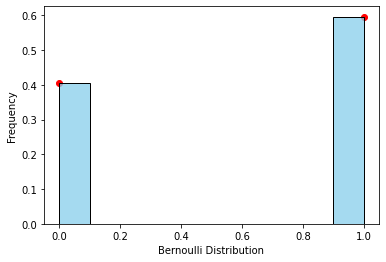

In [225]:
bern_x = np.array([i for i in range(min(bern_data), max(bern_data) + 1, 1)])
bern_y = stats.bernoulli.pmf(bern_x, bern_p_est)
plot_random_variables(bern_data, 'Bernoulli Distribution', 
                      est_data=[bern_x, bern_y], stat='probability')

In [302]:
bernoulli.interval(alpha=0.95, p=bern_p_est)

(0.0, 1.0)

## Binonmial Random Variable

In [123]:
from scipy.stats import binom
bin_data = binom.rvs(n=10, p=0.6, size=sample_n)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


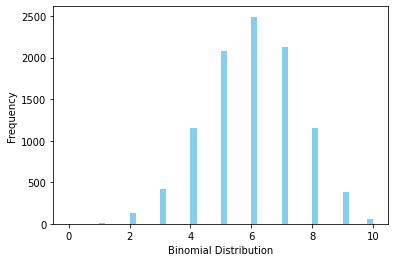

In [124]:
plot_random_variables(bin_data, 'Binomial Distribution')

In [125]:
params = [15, 0.8]
dist = 'binomial'
bin_est = scipy.optimize.fmin(loss, params, args=(bin_data, dist))

Optimization terminated successfully.
         Current function value: 18506.950420
         Iterations: 77
         Function evaluations: 143


In [126]:
bin_n_est = bin_est[0]
bin_p_est = bin_est[1]
bin_n_est, bin_p_est

(10.000011563877518, 0.5960705128330127)

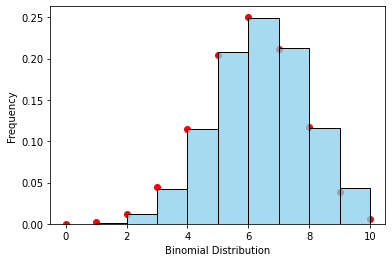

In [231]:
bin_x = np.array([i for i in range(min(bin_data), max(bin_data) + 1, 1)])
bin_y = stats.binom.pmf(bin_x, bin_n_est, bin_p_est)
plot_random_variables(bin_data, 'Binomial Distribution', 
                      est_data=[bin_x, bin_y], stat='probability',
                      bins=max(bin_data) - min(bin_data))

In [304]:
binom.interval(alpha=0.95, n=int(bin_n_est), p=bin_p_est)

(3.0, 9.0)

## Poisson Random Variable

In [127]:
from scipy.stats import poisson
pois_data = poisson.rvs(mu=3, size=sample_n)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


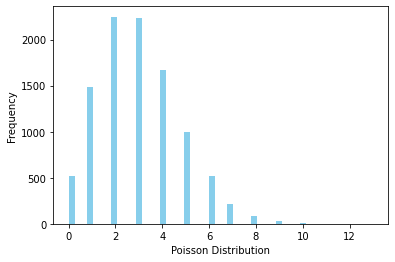

In [128]:
plot_random_variables(pois_data, 'Poisson Distribution')

In [129]:
params = [8]
dist = 'poisson'
pois_est = scipy.optimize.fmin(loss, params, args=(pois_data, dist))

Optimization terminated successfully.
         Current function value: 19353.805283
         Iterations: 19
         Function evaluations: 38


In [130]:
pois_mu_est = pois_est[0]
pois_mu_est

2.9957031249999955

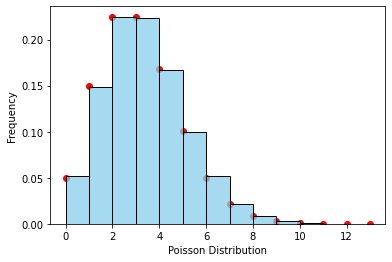

In [230]:
pois_x = np.array([i for i in range(min(pois_data), max(pois_data) + 1, 1)])
pois_y = stats.poisson.pmf(pois_x, pois_mu_est)
plot_random_variables(pois_data, 'Poisson Distribution', 
                      est_data=[pois_x, pois_y], stat='probability', 
                      bins=max(pois_data) - min(pois_data))

In [305]:
poisson.interval(alpha=0.95, mu=pois_mu_est)

(0.0, 7.0)

## Uniform Random Variable

The uniform function generates a uniform continuous variable between the specified interval via its loc and scale arguments. This distribution is constant between loc and loc + scale.

In [238]:
from scipy.stats import uniform
b = 30
a = 10
uni_data = uniform.rvs(size=sample_n, loc=a, scale=b-a)

In [261]:
uni_range = int(max(uni_data) - min(uni_data))

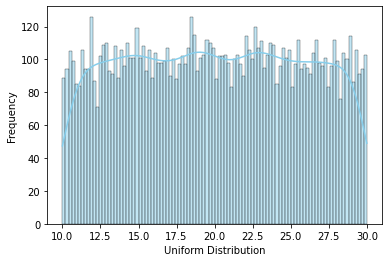

In [262]:
plot_random_variables(uni_data, 'Uniform Distribution', kde=True, bins=100)

In [307]:
uni_loc_est, uni_scale_est = uniform.fit(uni_data)

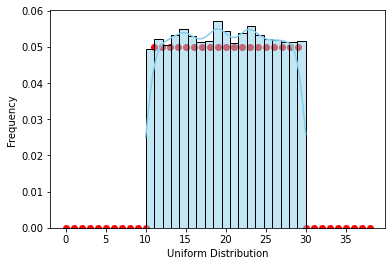

In [308]:
uni_x = [i for i in range(0, int(uni_loc_est + uni_scale_est + 10))]
uni_y = uniform.pdf(uni_x, loc=uni_loc_est, scale=uni_scale_est)
plot_random_variables(uni_data, 'Uniform Distribution', 
                      est_data=[uni_x, uni_y], stat='probability', 
                      bins=int(max(uni_data) - min(uni_data)),
                      kde=True)

In [309]:
uniform.interval(alpha=0.95, loc=uni_loc_est, 
                 scale=uni_scale_est)

(10.500016131938208, 29.498839983707505)

## Exponential Random Variable

In [33]:
from scipy.stats import expon
exp_data = expon.rvs(scale=1, loc=0, size=1000)

In [254]:
exp_range = int(max(exp_data) - min(exp_data))

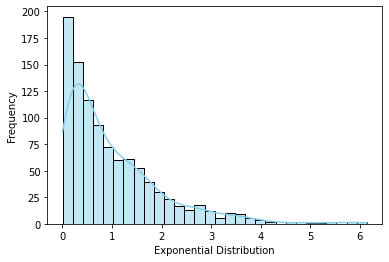

In [280]:
plot_random_variables(exp_data, 'Exponential Distribution', 
                      kde=True, bins=exp_range * 5)

In [310]:
exp_loc_est, exp_scale_est = expon.fit(exp_data)
exp_loc_est, exp_scale_est

(0.0010059884561884659, 1.0016740161076645)

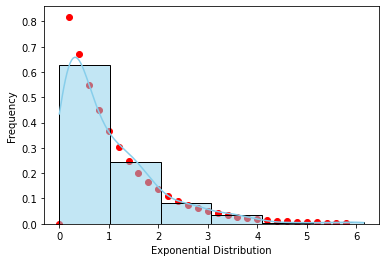

In [311]:
exp_x = [i/5 for i in range(exp_range * 5)]
exp_y = expon.pdf(exp_x, loc=exp_loc_est, scale=exp_scale_est)
plot_random_variables(exp_data, 'Exponential Distribution', 
                      est_data=[exp_x, exp_y], stat='probability', 
                      bins=exp_range, kde=True)

In [312]:
expon.interval(alpha=0.95, loc=exp_loc_est, scale=exp_scale_est)

(0.02636617885885482, 3.696060686195543)

## Normal Random Variable

* The loc argument corresponds to the mean of the distribution. scale corresponds to standard deviation
* If you want to maintain reproducibility, include a random_state argument assigned to a number.

In [36]:
from scipy.stats import norm

# generate random numbers from N(0,1)
normal_data = norm.rvs(size=10000, loc=0, scale=1)

In [269]:
norm_range = int(max(normal_data) - min(normal_data))
norm_range

7

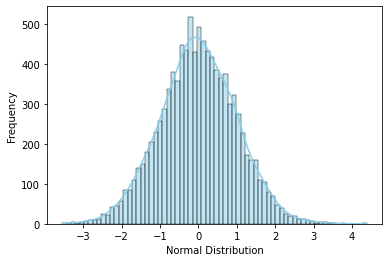

In [271]:
plot_random_variables(normal_data, 'Normal Distribution', kde=True, bins=norm_range * 10)

In [273]:
seed = np.random.seed(32)
normal_data_seed = norm.rvs(size=10000, loc=0, scale=1, random_state=seed)
norm_seed_range = int(max(normal_data_seed) - min(normal_data_seed))
norm_seed_range

7

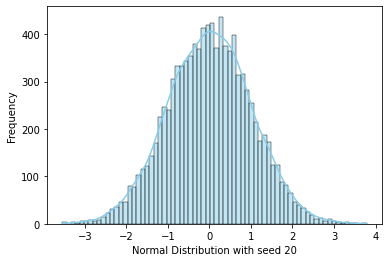

In [274]:
plot_random_variables(normal_data_seed, 'Normal Distribution with seed 20', kde=True, 
                      bins=norm_seed_range * 10)

In [313]:
norm_loc_est, norm_scale_est = norm.fit(normal_data)
norm_loc_est, norm_scale_est

(-0.003048231785422756, 0.9881582374912226)

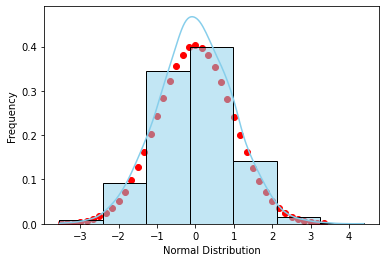

In [314]:
norm_x = [i/6 for i in range(- norm_range * 3, norm_range * 3)]
norm_y = norm.pdf(norm_x, loc=norm_loc_est, scale=norm_scale_est)
plot_random_variables(normal_data, 'Normal Distribution', 
                      est_data=[norm_x, norm_y], stat='probability', 
                      bins=norm_range, kde=True)

In [315]:
norm.interval(alpha=0.95, loc=norm_loc_est, 
              scale=norm_scale_est)

(-1.9398027882947964, 1.9337063247239508)

## Gamma Random Variable

* When $a$(alpha) is an integer, gamma reduces to the Erlang distribution, and when $a=1$ to the exponential distribution. 
* To shift distribution use the loc argument, to scale use scale argument(scale = 1/beta),

In [290]:
from scipy.stats import gamma
gamma_data = gamma.rvs(a=5, scale=2, loc=0, size=10000)
gamma_range = int(max(gamma_data) - min(gamma_data))
gamma_range

33

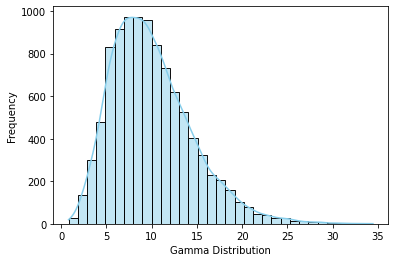

In [291]:
plot_random_variables(gamma_data, 'Gamma Distribution', 
                      kde=True, bins=gamma_range)

In [317]:
gamma_a_est, gamma_loc_est, gamma_scale_est = gamma.fit(gamma_data)
gamma_a_est, gamma_loc_est, gamma_scale_est

(5.195362381129441, -0.17251380487802548, 1.9614109420945045)

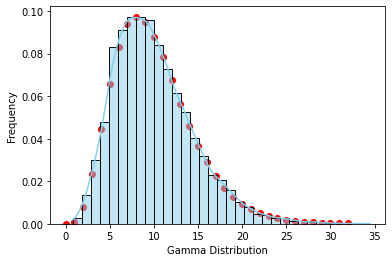

In [318]:
gamma_x = [i for i in range(gamma_range)]
gamma_y = gamma.pdf(gamma_x, a=gamma_a_est, 
                    loc=gamma_loc_est, 
                    scale=gamma_scale_est)
plot_random_variables(gamma_data, 'Gamma Distribution', 
                      est_data=[gamma_x, gamma_y], stat='probability', 
                      bins=gamma_range, kde=True)

In [319]:
gamma.interval(alpha=0.95, a=gamma_a_est,
               loc=gamma_loc_est,
               scale=gamma_scale_est)

(3.2273395982296735, 20.468591498932252)

# hypothesis tests

In [414]:
def test_results(result, statement):
    stat = result[0]
    p_val = result[1]
    print('stat=%.3f, p=%.3f' % (stat, p_val))
    if p_val > 0.05:
        print('Probably ', statement)
    else:
        if statement.find('not') == -1:
            print('Probably not ', statement)
        else:
            print('Probably ', statement.split(' ')[1])
    print('--------------------------')

## Normality Tests

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

In [321]:
normality_stat = 'Gaussian'

### Shapiro-Wilk Test



> for small sample size (n <50), Shapiro–Wilk test should be used as it has more power to detect the nonnormality and this is the most popular and widely used method.



In [434]:
test_results(stats.shapiro(normal_data[:20]), normality_stat)
test_results(stats.shapiro(exp_data[:20]), normality_stat)

stat=0.919, p=0.097
Probably  Gaussian
--------------------------
stat=0.886, p=0.022
Probably not  Gaussian
--------------------------


### D’Agostino’s K^2 Test




> It first computes the skewness and kurtosis to quantify how far the distribution is from Gaussian in terms of asymmetry and shape. 

> It then calculates how far each of these values differs from the value expected with a Gaussian distribution, and computes a single P value from the sum of these discrepancies. 

> It is a versatile and powerful normality test, and is recommended





In [435]:
test_results(stats.normaltest(normal_data_seed), normality_stat)
test_results(stats.normaltest(exp_data), normality_stat)

stat=0.399, p=0.819
Probably  Gaussian
--------------------------
stat=355.938, p=0.000
Probably not  Gaussian
--------------------------


### Anderson-Darling Test

>  to test if a sample of data came from a population with a specific distribution.

In [436]:
# ad_result = stats.anderson(normal_data)
# ad_result.statistic, ad_result.critical_values, ad_result.significance_level

ad_result = stats.anderson(normal_data)
ad_result.statistic, ad_result.critical_values, ad_result.significance_level

(0.615834532694862,
 array([0.576, 0.656, 0.787, 0.918, 1.092]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

## Correlation Tests

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [360]:
corr_statement = 'independent'
norm_data_plus = normal_data + 1

norm_data_rdm = normal_data.copy()
for i in range(len(normal_data)):
    if not np.random.randint(2):
        norm_data_rdm[i] = norm_data_rdm[i] + np.random.randint(10)
    else:
        norm_data_rdm[i] = norm_data_rdm[i] - np.random.randint(20)

In [368]:
rdm_data = np.random.randn(10000)
rdm_data[:10]

array([ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521])

### Pearson’s Correlation Coefficient

> used in the context of a linear relationship between 2 continuous variables and expressed as Pearson product-moment correlation. 

> The Pearson correlation coefficient is typically used for jointly normally distributed data (data that follow a bivariate normal distribution).

> Pearson is most appropriate for measurements taken from an interval scale

In [376]:
test_results(stats.pearsonr(normal_data, uni_data), corr_statement)

test_results(stats.pearsonr(normal_data, norm_data_plus), corr_statement)

test_results(stats.pearsonr(normal_data, norm_data_rdm), corr_statement)

test_results(stats.pearsonr(normal_data, rdm_data), corr_statement)

stat=0.009, p=0.348
Probably  independent
--------------------------
stat=1.000, p=0.000
Probably not  independent
--------------------------
stat=0.124, p=0.000
Probably not  independent
--------------------------
stat=-0.002, p=0.820
Probably  independent
--------------------------


### Spearman’s Rank Correlation

> the Spearman is more appropriate for measurements taken from ordinal scales.

> This is also the best alternative to Spearman correlation (non-parametric) when your sample size is small and has many tied ranks.

In [377]:
test_results(stats.spearmanr(normal_data, uni_data), corr_statement)
test_results(stats.spearmanr(normal_data, norm_data_plus), corr_statement)
test_results(stats.spearmanr(normal_data, norm_data_rdm), corr_statement)
test_results(stats.spearmanr(normal_data, rdm_data), corr_statement)

stat=0.010, p=0.330
Probably  independent
--------------------------
stat=1.000, p=0.000
Probably not  independent
--------------------------
stat=0.131, p=0.000
Probably not  independent
--------------------------
stat=0.001, p=0.940
Probably  independent
--------------------------


### Kendall’s Rank Correlation

> Kendall rank correlation (non-parametric) is an alternative to Pearson's correlation (parametric) when the data you're working with has failed one or more assumptions of the test. 


In [378]:
test_results(stats.kendalltau(normal_data, uni_data), corr_statement)
test_results(stats.kendalltau(normal_data, norm_data_plus), corr_statement)
test_results(stats.kendalltau(normal_data, norm_data_rdm), corr_statement)
test_results(stats.kendalltau(normal_data, rdm_data), corr_statement)

stat=0.006, p=0.332
Probably  independent
--------------------------
stat=1.000, p=0.000
Probably not  independent
--------------------------
stat=0.092, p=0.000
Probably not  independent
--------------------------
stat=0.000, p=0.947
Probably  independent
--------------------------


### Chi-Squared Test

> help us better understand and interpret the relationship between our two categorical variables

> First, Chi-Square only tests whether two individual variables are independent in a binary, “yes” or “no” format.

> Chi-Square requires researchers to use numerical values, also known as frequency counts, instead of using percentages or ratios. 

In [450]:
test_results(stats.chi2_contingency([100, 100], [20, 20]), corr_statement)
test_results(stats.chi2_contingency(bern_data[:10] + 1, bin_data[:10]), corr_statement)
test_results(stats.chi2_contingency(pois_data[:10] + 1, pois_data[:10] + 5), corr_statement)

stat=0.000, p=1.000
Probably  independent
--------------------------
stat=0.000, p=1.000
Probably  independent
--------------------------
stat=0.000, p=1.000
Probably  independent
--------------------------


## Stationary Tests

* H0: a unit root is present (series is non-stationary).
* H1: a unit root is not present (series is stationary).

In [393]:
stationary_state = 'not stationary'

### Augmented Dickey-Fuller Unit Root Test

In [407]:
from statsmodels.tsa.stattools import adfuller
# Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.

In [406]:
test_results(adfuller(normal_data), stationary_state)
test_results(adfuller(exp_data), stationary_state)
test_results(adfuller(bin_data), stationary_state)
test_results(adfuller(bern_data), stationary_state)
test_results(adfuller(uni_data), stationary_state)

stat=-44.765, p=0.000
Probably  stationary
--------------------------
stat=-31.145, p=0.000
Probably  stationary
--------------------------
stat=-27.485, p=0.000
Probably  stationary
--------------------------
stat=-100.391, p=0.000
Probably  stationary
--------------------------
stat=-100.008, p=0.000
Probably  stationary
--------------------------


### Kwiatkowski-Phillips-Schmidt-Shin

In [401]:
from statsmodels.tsa.stattools import kpss

# Tests whether a time series is trend stationary or not.

In [405]:
test_results(kpss(normal_data, lags='auto'), stationary_state)
test_results(kpss(uni_data, lags='auto'), stationary_state)

test_results(kpss([1, 2, 3, 4, 5], lags='auto'), stationary_state)

stat=0.091, p=0.100
Probably  not stationary
--------------------------
stat=0.215, p=0.100
Probably  not stationary
--------------------------
stat=0.371, p=0.089
Probably  not stationary
--------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


## Parametric Statistical Hypothesis Tests

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

In [408]:
param_statement = 'same distribution'

### Student’s t-test

> The t-test is used to compare two means (averages) in order to find out whether they are different, and if so, how significant the difference is.

> Like a z-test, a t-test also assumes a normal distribution of the sample

In [422]:
test_results(stats.ttest_ind(normal_data, normal_data_seed), param_statement)
test_results(stats.ttest_ind(normal_data, norm_data_rdm), param_statement)
test_results(stats.ttest_ind(normal_data, rdm_data), param_statement)
test_results(stats.ttest_ind(normal_data, gamma_data), param_statement)

stat=-0.769, p=0.442
Probably  same distribution
--------------------------
stat=29.036, p=0.000
Probably not  same distribution
--------------------------
stat=-0.794, p=0.427
Probably  same distribution
--------------------------
stat=-218.406, p=0.000
Probably not  same distribution
--------------------------


### Paired Student’s t-test

> Choose the paired t-test if you have two measurements on the same item, person or thing. 
> But you should also choose this test if you have two items that are being measured with a unique condition.

In [421]:
test_results(stats.ttest_rel(normal_data, normal_data_seed), param_statement)
test_results(stats.ttest_rel(normal_data, norm_data_rdm), param_statement)
test_results(stats.ttest_rel(normal_data, rdm_data), param_statement)
test_results(stats.ttest_rel(normal_data, gamma_data), param_statement)

stat=-0.773, p=0.440
Probably  same distribution
--------------------------
stat=29.463, p=0.000
Probably not  same distribution
--------------------------
stat=-0.793, p=0.428
Probably  same distribution
--------------------------
stat=-218.135, p=0.000
Probably not  same distribution
--------------------------


### Analysis of Variance Test (ANOVA)

> You might use Analysis of Variance (ANOVA) as a marketer when you want to test a particular hypothesis. 

> You would use ANOVA to help you understand how your different groups respond, with a null hypothesis for the test that the means of the different groups are equal.

In [425]:
test_results(stats.f_oneway(normal_data, normal_data_seed, rdm_data), param_statement)
test_results(stats.f_oneway(normal_data, uni_data, rdm_data), param_statement)

stat=0.406, p=0.667
Probably  same distribution
--------------------------
stat=115404.368, p=0.000
Probably not  same distribution
--------------------------


### Repeated Measures ANOVA Test

## Nonparametric Statistical Hypothesis Tests


* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

In [426]:
nonparam_state = 'equal distribution'

### Mann-Whitney U Test

> You want to know if two groups are different on your variable of interest.

> Your variable of interest is continuous.

> You have two and only two groups.

> You have a skewed variable of interest.

In [429]:
test_results(stats.mannwhitneyu(normal_data, rdm_data), nonparam_state)
test_results(stats.mannwhitneyu(normal_data, normal_data_seed), nonparam_state)
test_results(stats.mannwhitneyu(normal_data, gamma_data), nonparam_state)
test_results(stats.mannwhitneyu(normal_data, norm_data_rdm), nonparam_state)

stat=49696176.000, p=0.228
Probably  equal distribution
--------------------------
stat=49650640.000, p=0.196
Probably  equal distribution
--------------------------
stat=41121.000, p=0.000
Probably not  equal distribution
--------------------------
stat=47730496.500, p=0.000
Probably not  equal distribution
--------------------------


### Wilcoxon Signed-Rank Test

>  It does not require any assumptions about the shape of the distribution.

> Wilcoxon signed-rank test is used to compare two related samples, matched samples, 

> or to conduct a paired difference test of repeated measurements on a single sample to assess whether their population mean ranks differ.

In [430]:
test_results(stats.wilcoxon(normal_data, rdm_data), nonparam_state)
test_results(stats.wilcoxon(normal_data, normal_data_seed), nonparam_state)
test_results(stats.wilcoxon(normal_data, gamma_data), nonparam_state)
test_results(stats.wilcoxon(normal_data, norm_data_rdm), nonparam_state)

stat=24807067.000, p=0.498
Probably  equal distribution
--------------------------
stat=24813285.000, p=0.512
Probably  equal distribution
--------------------------
stat=15.000, p=0.000
Probably not  equal distribution
--------------------------
stat=15244612.000, p=0.000
Probably not  equal distribution
--------------------------


### Kruskal-Wallis H Test

>  two or more groups of an independent variable on a continuous or ordinal dependent variable

In [451]:
test_results(stats.kruskal(normal_data, rdm_data, normal_data_seed), nonparam_state)
test_results(stats.kruskal(normal_data, normal_data_seed), nonparam_state)
test_results(stats.kruskal(normal_data, gamma_data), nonparam_state)
test_results(stats.kruskal(normal_data, norm_data_rdm), nonparam_state)

stat=0.868, p=0.648
Probably  equal distribution
--------------------------
stat=0.732, p=0.392
Probably  equal distribution
--------------------------
stat=14974.589, p=0.000
Probably not  equal distribution
--------------------------
stat=30.902, p=0.000
Probably not  equal distribution
--------------------------


### Friedman Test

> used to determine if 3 or more measurements from the same group of subjects are significantly different from each other on a skewed variable of interest.

In [433]:
test_results(stats.friedmanchisquare(normal_data, rdm_data, normal_data_seed), nonparam_state)
test_results(stats.friedmanchisquare(normal_data, normal_data_seed, gamma_data), nonparam_state)
test_results(stats.friedmanchisquare(normal_data, gamma_data, norm_data_rdm), nonparam_state)

stat=0.135, p=0.935
Probably  equal distribution
--------------------------
stat=14961.034, p=0.000
Probably not  equal distribution
--------------------------
stat=13214.634, p=0.000
Probably not  equal distribution
--------------------------
